## <span style="color:blue"><u>Index</u></span>


#### [1.Importing Libraries](#ImportingLibraries)

#### [2.Understanding Data](#UnderstandingData)
#### [3.Performing EDA](#PerformingEDA)
#### [4.Cleaning And Preparing Data](#CleaningAndPreparingData)
#### [5.Model Building (Multiple Linear Regression)](#ModelBuilding)
#### [6.Verify Assumptions](#VerifyAssumptions)
#### [7.Prediction Using Final Models](#PredictionUsingFinalModel)
#### [8.Model Evaluation](#ModelEvaluation)
#### [9.Overall Observations Summary](#OverallObservationsSummary)

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## 1.  Importing Libraries<a class="anchor" id="ImportingLibraries"></a>



In [186]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## 2.Understanding Data<a class="anchor" id="UnderstandingData"></a>


In [187]:
#Reading Data
bike_df=pd.read_csv("day.csv")

In [188]:
#Visualising Data
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [189]:
#Checking dataTypes and count
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [190]:
#Desciptive Statistics - Mean, Median,Standard Deviations and percentiles
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [191]:
#Checking the size of the data
bike_df.shape

(730, 16)

In [192]:
#Check for missing values in each column in percentage
percent_missing = bike_df.isnull().sum() * 100 / len(bike_df)
percent_missing

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [193]:
#Count the number of missing values in each row
bike_df.isnull().sum(axis=1).sort_values(ascending=False)

729    0
250    0
248    0
247    0
246    0
      ..
484    0
483    0
482    0
481    0
0      0
Length: 730, dtype: int64

In [194]:
#Drop duplicates from data, if any
bike_df. drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


## 4.Performing EDA<a class="anchor" id="PerformingEDA"></a>
### Analysing Numerical Variabels with target variables

<Figure size 72x72 with 0 Axes>

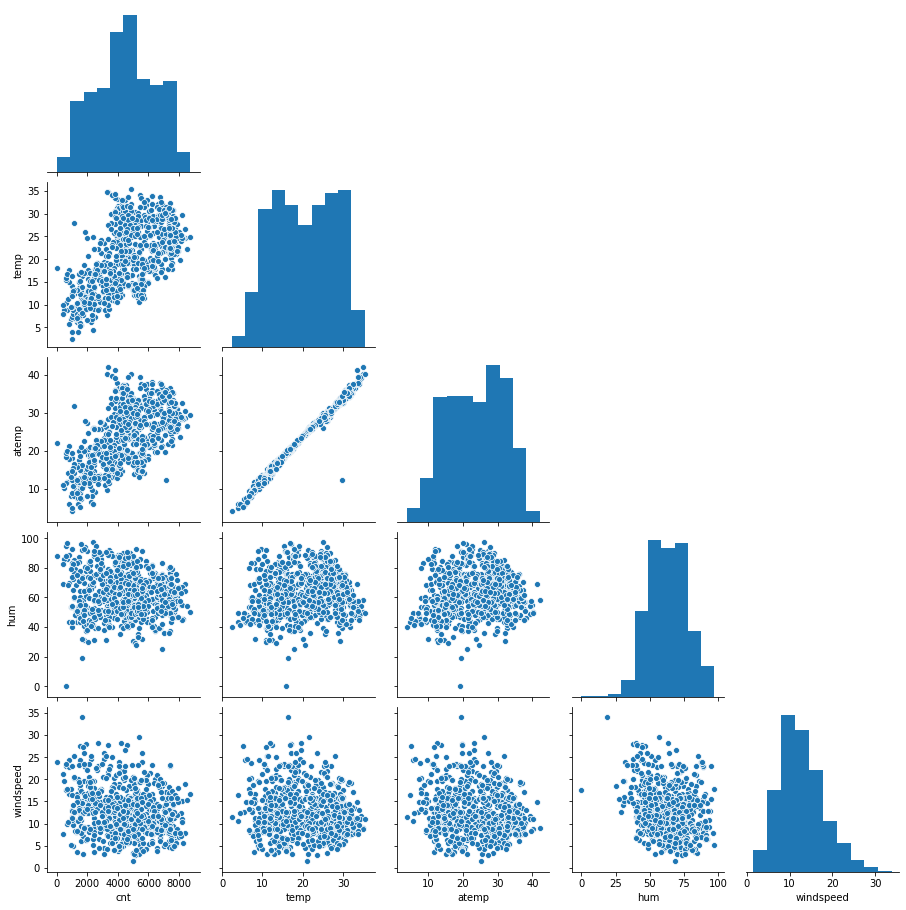

In [195]:
#Pair plot to visualize the relationship between target variable and other quantitative independent variables

plt.figure(figsize = (1,1))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'],corner=True)
plt.show()

#### Observations
- atemp and temp has the highest corelation with the target variable 'cnt'

- temp and atemp are hugely co-related with each other

### Analysing Categorcal Variabels with target variables

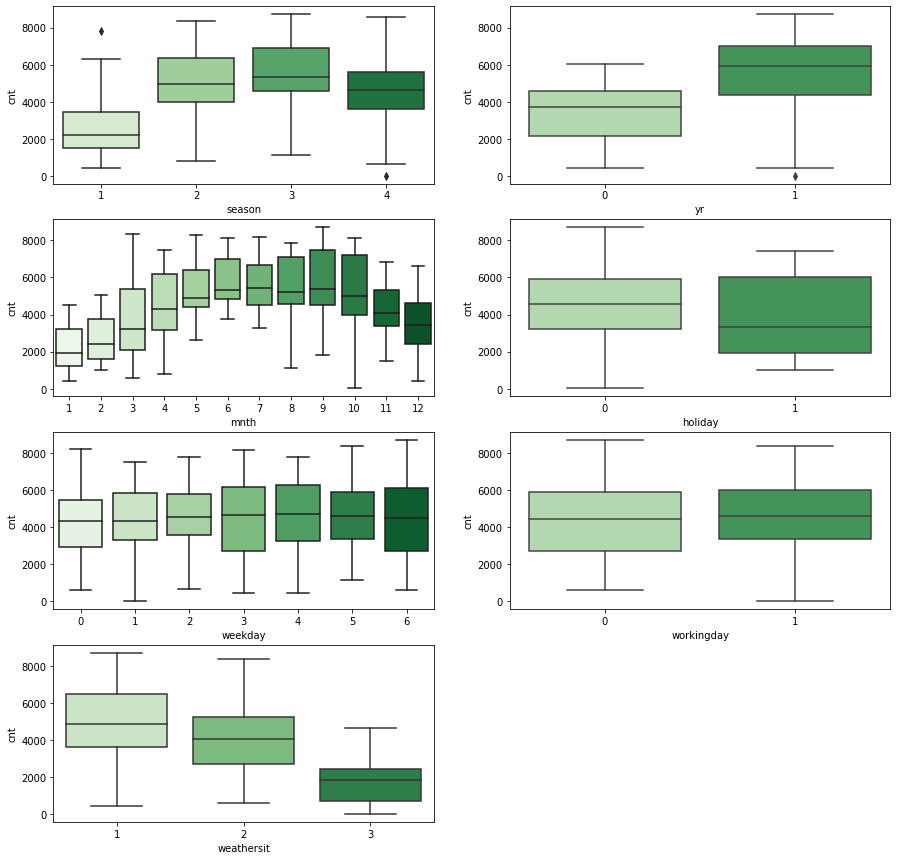

In [196]:
#BoxPlott to visualize the relationship between target variable and other categorical independent variables

plt.figure(figsize=(15, 15))
for var in enumerate(['season','yr','mnth','holiday','weekday','workingday','weathersit']):
    plt.subplot(4,2,var[0]+1)
    sns.boxplot(data=bike_df, x=var[1], y='cnt',palette="Greens")
plt.show()

#### Observations

- Demand has been increasing year by year as business grows old
- Demand is continuously going up each month till September month and after that demand is decreasing
- Season fall has high demand for rental bikes
- On holidays, demand is low.
- Weekday has no major impact on demand
- Clear weathershit has highest demand compared to others
 

### Let's check the correlation coefficients to see which variables are highly correlated


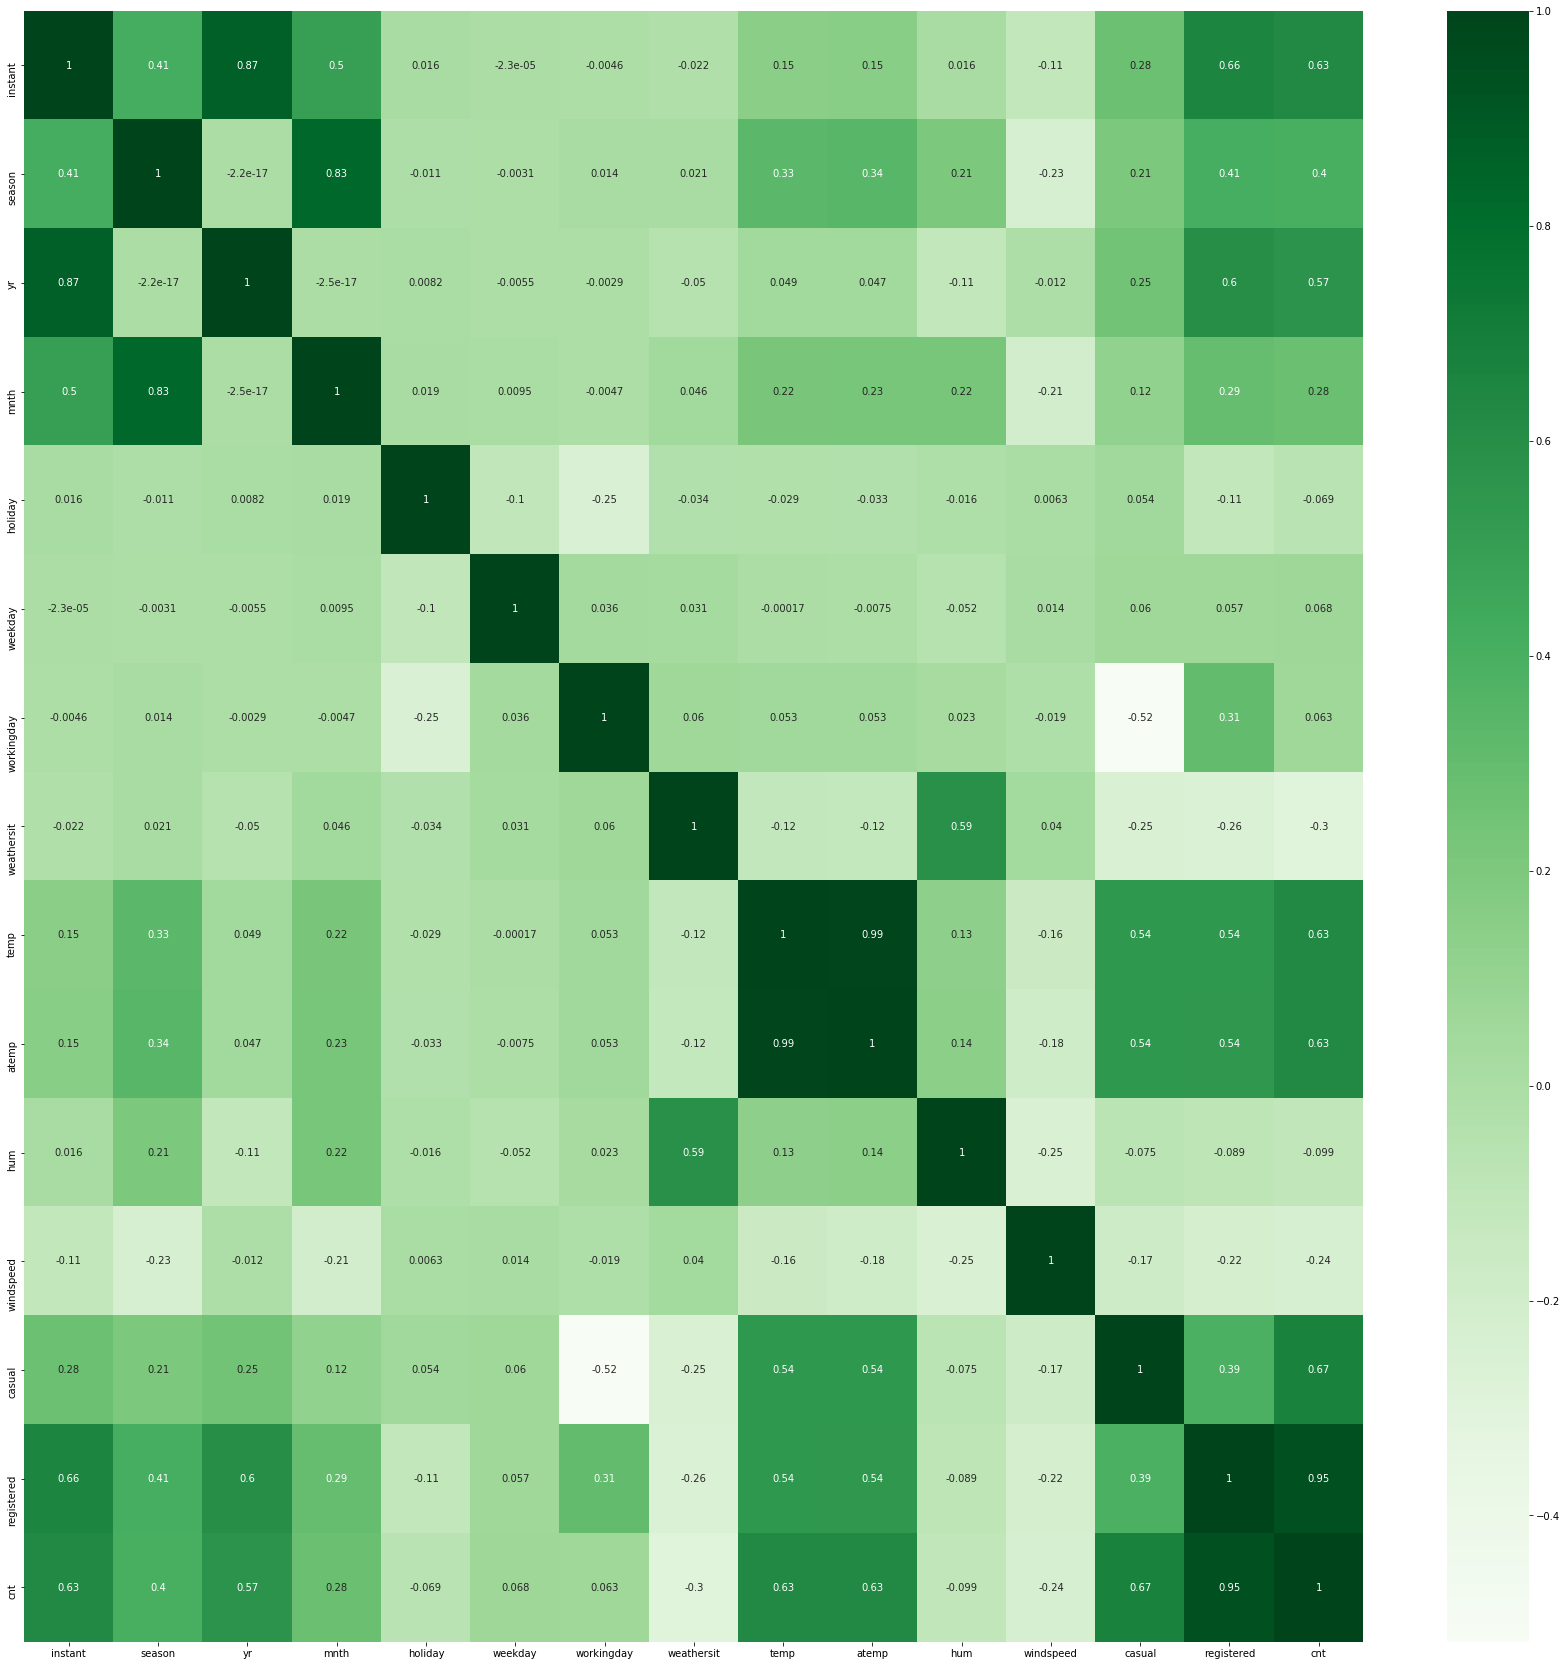

In [197]:
plt.figure(figsize = (30,30))
sns.heatmap(bike_df.corr(), annot = True,cmap="Greens")
plt.show()

#### Observations
- The correlation matrix clearly shows the relationship between most correlated variables.

- Cnt is closely related to year, season and month

## 4.Cleaning And Preparing Data<a class="anchor" id="CleaningAndPreparingData"></a>

### Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value, so as it's unique we can remove it

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could deleted this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [198]:
#Looking at the initial columns
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [199]:
#Dropping few unneccesary columns
bike_df.drop(['instant', 'dteday','casual','registered'], axis=1,inplace=True)

In [200]:
#Looking at the remaining columns after dropping few
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [201]:
#Dropping 'atemp' column as it is similar to 'temp' column
bike_df.drop(['atemp'], axis=1,inplace=True)

### Encoding Independent Categorical Variables
Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

In [202]:
# Encoding/mapping the season column
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [203]:
# Encoding/mapping the month column
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [204]:
# Encoding/mapping the weekday column
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [205]:
# Encoding/mapping the weathersit column
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [206]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


### Creating Dummy Variables

DUMMY CODING, Perhaps the simplest and perhaps most common coding system is called dummy coding. It is a way to make the categorical variable into a series of dichotomous variables (variables that can have a value of zero or one only.)

In [207]:
#Dropping the first columns as (p-1) dummies can explain p categories.
#In weathersit first column was not dropped so as to not lose the info about severe weather situation.

bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

In [208]:
#Displaying newly added columns
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [209]:
#Print few rows to inspect
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,1,0,0


## 5.Model Building<a class="anchor" id="ModelBuilding"></a>



### 1.Split Data into training and test


In [210]:
# Checking shape before splitting
bike_df.shape

(730, 30)

In [211]:
# y to contain only target variable
y=bike_df.pop('cnt')

#X is all remaining variables
X=bike_df

In [212]:
bike_df.shape

(730, 29)

In [213]:
#Train Test split with 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [214]:
#View independent variables
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [215]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


### Let's check the correlation coefficients to see which variables are highly correlated after encoding


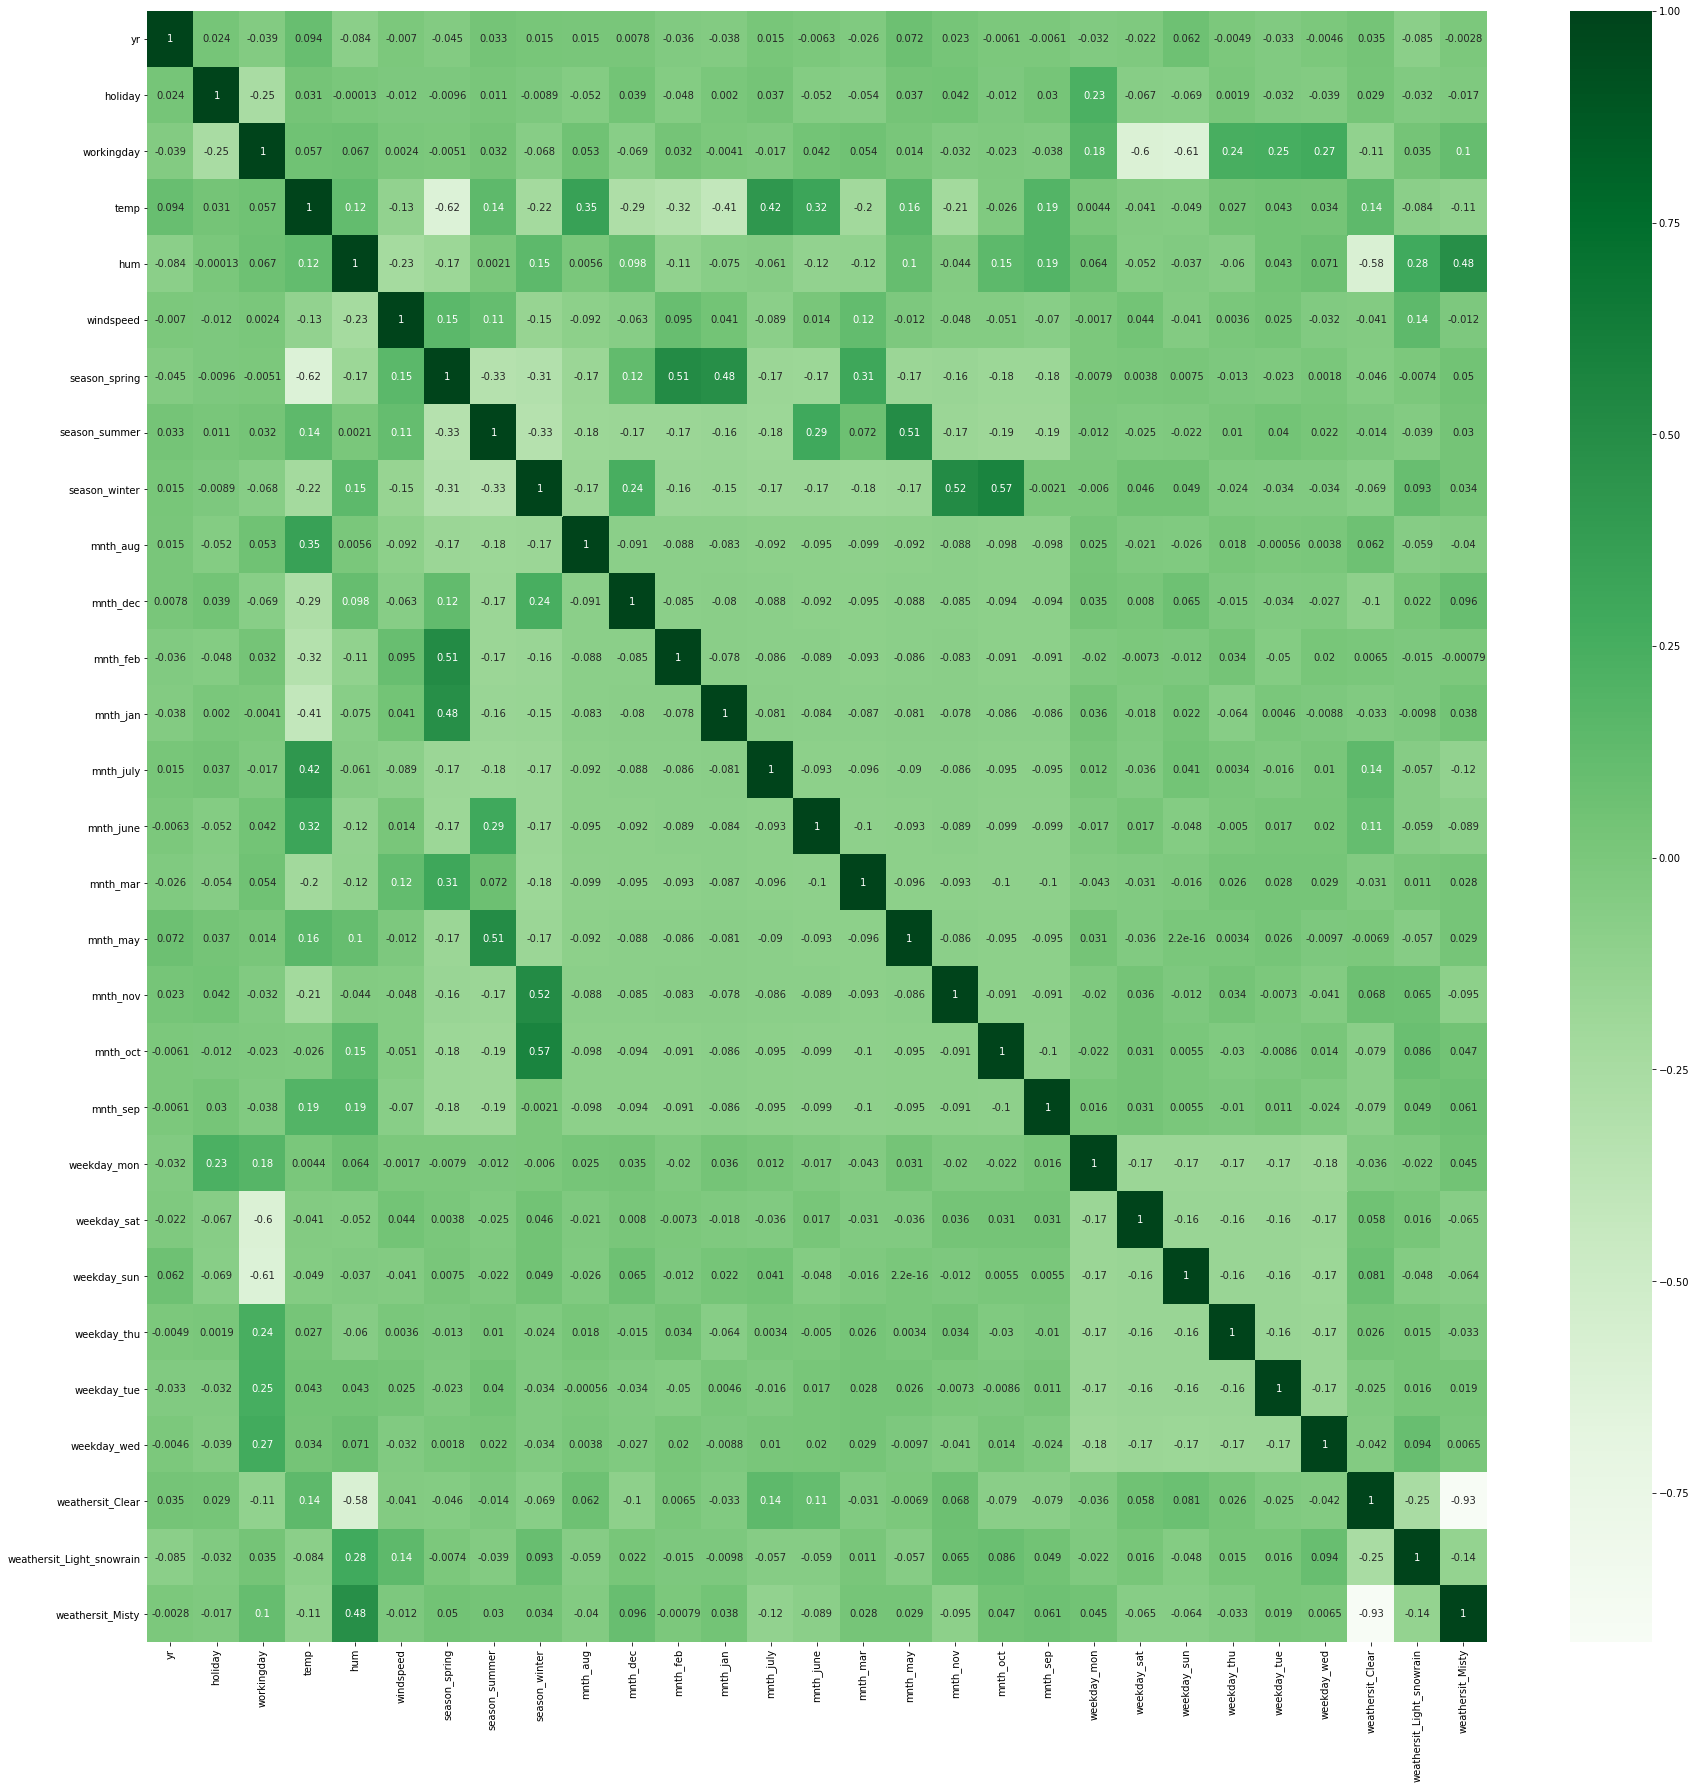

In [216]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), annot = True,cmap="Greens")
plt.show()

### 2.Feature Scaling

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [217]:
scaler = MinMaxScaler()

In [218]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [219]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'hum', 'windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [220]:
#Inspect date of  Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.499022,0.027397,0.692759,0.555633,0.648898,0.343667,0.238748,0.256360,0.236791,0.086106,...,0.091977,0.152642,0.136986,0.142857,0.138943,0.136986,0.154599,0.630137,0.035225,0.334638
std,0.500489,0.163398,0.461802,0.232202,0.146794,0.162310,0.426736,0.437051,0.425529,0.280795,...,0.289276,0.359994,0.344170,0.350270,0.346226,0.344170,0.361876,0.483240,0.184529,0.472326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352195,0.544225,0.227561,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.568130,0.650923,0.314103,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755555,0.753113,0.436348,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
466,1,0,1,0.428749,0.480464,0.552573,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
96,0,0,1,0.479433,0.621297,0.288453,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
432,1,0,1,0.445643,0.419493,0.808970,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
687,1,0,1,0.407630,0.642335,0.438441,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
507,1,0,1,0.712791,0.798196,0.164117,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### 3.Building Model using RFE and Automated approach


#### Use RFE to eliminate some columns
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.


In [222]:
#Build linear regression mosdel using SkLearn

In [223]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
#Reducing the number of columns to desired count
rfe = RFE(lr,12)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=12, step=1, verbose=0)

In [225]:
#Columns selected by RFE with their importance
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 2),
 ('mnth_july', False, 17),
 ('mnth_june', False, 9),
 ('mnth_mar', False, 18),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 14),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', False, 4)]

In [226]:
#Display supported variables
final_col = X_train.columns[rfe.support_]
final_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'mnth_sep', 'weathersit_Clear',
       'weathersit_Light_snowrain'],
      dtype='object')

In [227]:
#Display unsupported variables
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Misty'],
      dtype='object')

In [228]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[final_col]

### 4.Manual Feature Elimination


In [229]:
#Function to build a model using statsmodel api

def create_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm,X_train_sm

In [230]:
#Function to calculate VIFs and print them
def fetch_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [231]:
#Print the VIF values
fetch_vif(X_train_rfe)

                     Features    VIF
3                         hum  16.38
2                        temp  15.44
4                   windspeed   4.80
10           weathersit_Clear   3.30
5               season_spring   2.66
6               season_winter   2.58
0                          yr   2.03
8                    mnth_nov   1.70
7                    mnth_dec   1.37
9                    mnth_sep   1.20
11  weathersit_Light_snowrain   1.19
1                     holiday   1.04


### Model 1

In [232]:
#Build MODEL
lr1,X_train_sm=create_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.23e-190
Time:                        09:32:50   Log-Likelihood:                -4138.3
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     498   BIC:                             8358.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 2

In [233]:
#Removing the variable 'hum' based on its High VIF
X_train_new = X_train_rfe.drop(["hum"], axis = 1)


In [234]:
#Print the VIF values
fetch_vif(X_train_new)

                     Features   VIF
2                        temp  5.35
3                   windspeed  4.63
9            weathersit_Clear  2.94
5               season_winter  2.12
0                          yr  2.03
4               season_spring  1.75
7                    mnth_nov  1.68
6                    mnth_dec  1.32
8                    mnth_sep  1.18
10  weathersit_Light_snowrain  1.15
1                     holiday  1.04


In [235]:
#Build MODEL
lr2,X_train_sm=create_model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.10e-187
Time:                        09:32:50   Log-Likelihood:                -4146.4
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 3


In [236]:
#Removing the variable 'weathersit_Clear' as temp and windspeed are important with genearl knowledge
X_train_new = X_train_new.drop(["weathersit_Clear"], axis = 1)

In [237]:
#Print the VIF values
fetch_vif(X_train_new)

                    Features   VIF
3                  windspeed  4.59
2                       temp  4.15
5              season_winter  2.11
0                         yr  2.03
4              season_spring  1.67
7                   mnth_nov  1.64
6                   mnth_dec  1.32
8                   mnth_sep  1.17
9  weathersit_Light_snowrain  1.09
1                    holiday  1.04


In [238]:
#Build MODEL
lr3,X_train_sm= create_model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          9.34e-172
Time:                        09:32:50   Log-Likelihood:                -4186.9
No. Observations:                 511   AIC:                             8396.
Df Residuals:                     500   BIC:                             8442.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 4

In [239]:
#Removing the variable 'mnth_nov' based on its High P value
X_train_new = X_train_new.drop(["mnth_nov"], axis = 1)

In [240]:
#Function to calculate VIFs and print them
fetch_vif(X_train_new)

                    Features   VIF
3                  windspeed  4.56
2                       temp  4.10
0                         yr  2.02
4              season_spring  1.67
5              season_winter  1.44
6                   mnth_dec  1.22
7                   mnth_sep  1.16
8  weathersit_Light_snowrain  1.09
1                    holiday  1.03


In [241]:
#Build MODEL
lr4,X_train_sm=create_model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     231.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.15e-172
Time:                        09:32:50   Log-Likelihood:                -4188.9
No. Observations:                 511   AIC:                             8398.
Df Residuals:                     501   BIC:                             8440.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### We can consider lr4 model as final as it has very low multicolinearity between the independent variables 

##### The p-values for all the independent variables seems to be significant, 4.15e-172 (almost equals to zero)

##### F-Statistics value of 231.3 (which is greater than 1)

## 6.Verify Assumptions<a class="anchor" id="VerifyAssumptions"></a>

### Residual Analysis


In [242]:
#Find the y_train_pred using the final model
y_train_pred = lr4.predict(X_train_sm)

Text(0.5, 0, 'Errors')

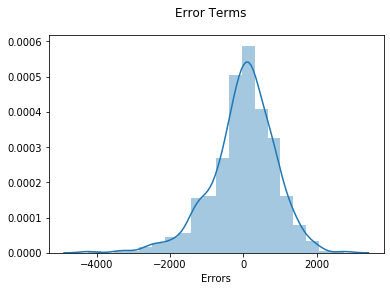

In [243]:
res = y_train-y_train_pred
# Plot the error terms histogram
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors') 

##### From above plot we can say that Error terms are normally distributed here with mean 0


### Actual Vs Predicted Values


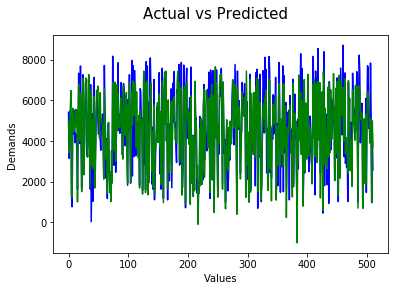

In [244]:
# Actual vs Predicted Values
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Values')
plt.ylabel('Demands')
plt.show()

##### Actual and Predicted Values are almost the same and are representing the same pattern

### Multicollinearity Check

In [245]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
fetch_vif(X_train_new)

                    Features   VIF
3                  windspeed  4.56
2                       temp  4.10
0                         yr  2.02
4              season_spring  1.67
5              season_winter  1.44
6                   mnth_dec  1.22
7                   mnth_sep  1.16
8  weathersit_Light_snowrain  1.09
1                    holiday  1.03


##### From the above VIF calculation we could see that there is no multicollinearity between the predictor variables, as all the values are within the range of below 5


## 7.Prediction Using Final Model<a class="anchor" id="PredictionUsingFinalModel"></a>

A final machine learning model is a model that you use to make predictions on new data. That is, given new examples of input data, you want to use the model to predict the expected output

In [246]:
# Applying scaler() to all numeric independent variables in test dataset. 
# Note: we will only use scaler.transform as we want to match the model input but dont want the model to learn the data

num_vars = ['temp', 'hum', 'windspeed']

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
120,0,0,0,0.497384,0.785315,0.173093,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
447,1,0,0,0.561794,0.912409,0.351271,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
449,1,0,1,0.489992,0.492486,0.751290,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
555,1,0,1,0.838445,0.687849,0.266652,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
188,0,0,1,0.823663,0.781022,0.417954,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [247]:
# Visualising the data
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.502283,0.031963,0.662100,0.546994,0.641856,0.353336,0.264840,0.242009,0.260274,0.082192,...,0.059361,0.123288,0.159817,0.146119,0.150685,0.155251,0.109589,0.643836,0.013699,0.342466
std,0.501140,0.176306,0.474078,0.231930,0.146752,0.154190,0.442259,0.429281,0.439789,0.275286,...,0.236840,0.329520,0.367276,0.354034,0.358561,0.362974,0.313092,0.479962,0.116503,0.475622
min,0.000000,0.000000,0.000000,0.061289,0.261915,0.041051,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351139,0.520479,0.245522,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.518501,0.640189,0.347416,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754499,0.750751,0.430791,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.016896,1.002146,0.864144,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
#Display model columns
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_sep', 'weathersit_Light_snowrain'],
      dtype='object')

In [249]:
#Columns from our final model
cols = ['yr', 'holiday', 'temp',
        'windspeed', 'season_spring', 'season_winter','mnth_dec',
       'mnth_sep', 'weathersit_Light_snowrain']

X_test[cols].shape

(219, 9)

In [250]:
# Adding constant variable to test dataframe
X_test=X_test[cols]

X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 120 to 314
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   yr                         219 non-null    int64  
 2   holiday                    219 non-null    int64  
 3   temp                       219 non-null    float64
 4   windspeed                  219 non-null    float64
 5   season_spring              219 non-null    uint8  
 6   season_winter              219 non-null    uint8  
 7   mnth_dec                   219 non-null    uint8  
 8   mnth_sep                   219 non-null    uint8  
 9   weathersit_Light_snowrain  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [251]:
#Predict the values for test data
y_test_pred = lr4.predict(X_test_lm4)

In [252]:
y_test_pred.head()

120    3594.059679
447    5706.642393
449    5039.476971
555    6877.150934
188    4643.280357
dtype: float64


## 8. Model Evaluation<a class="anchor" id="ModelEvaluation"></a>

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses and it is also important to assess the efficacy of a model during initial research phases.

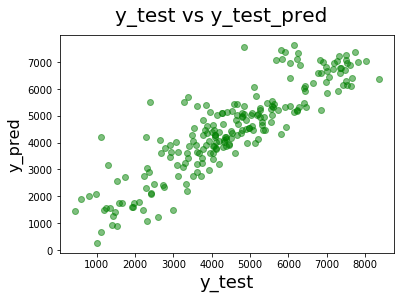

In [253]:
#Verifying the actual and predivted values spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5,color="green")
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### We can observe that y_test and y_test_pred are in allign

### R-Squared value for test data predictions

R-Squared value (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent/target variable that can be explained by the independent variable.

In [254]:
r2=r2_score(y_test,y_test_pred)
r2

0.7748039594113452

### R-Squared Adjusted value for test data predictions

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.

In [255]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7651065222568099

### Comparision between Training and Testing dataset

- Train dataset R^2          : 0.806
- Test dataset R^2           : 0.774
- Train dataset Adjusted R^2 : 0.803    
- Test dataset Adjusted R^2  : 0.765

#### R2 score has negligible difference, so we can infer this is the good to go model


## Overall Observations Summary<a class="anchor" id="OverallObservationsSummary"></a>

Observing and analysing the final model, the Boombikes company should focus on the following features:

- Company should focus on expanding business during September .i.e increasing the bikes availability and marketing campaigns and can expect a low business during december month.

- The company can expect a growing demand as the company gets older, as with the help of data we can observe that the business has been growing since it's inception.

- During the winter the business has good demand and it should consider promoting the business more and during spring the business is expected to be a bit low.

- Increase in windspeed in any given day can affect the business badly.

- Snow rain affects the demand badly and business revenue can go down.

- Temparature plays an important role in the demand, people generally prefer bike at moderate to high temperatures. We see highest rental counts between 32 to 36 degree celcius.